In [ ]:
# 1. Contoh data cleaning
# A. Missing values
import pandas as pd
import numpy as np

# Membuat dataframe contoh
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
    'Age': [25, 30, 35, 25, np.nan, 50],
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}

df = pd.DataFrame(data)

# Menampilkan data awal
print("Data Awal:")
print(df)

# Menghapus duplikat
df = df.drop_duplicates()

# Menangani missing values dengan mengisi nilai median untuk kolom numerik
df['Age'] = df['Age'].fillna(df['Age'].median())

# Menghapus baris yang mengandung missing values di kolom 'Name'
df = df.dropna(subset=['Name'])

# Menampilkan data setelah cleaning
print("\nData Setelah Cleaning:")
print(df)

Data Awal:
      Name   Age         City
0    Alice  25.0     New York
1      Bob  30.0  Los Angeles
2  Charlie  35.0      Chicago
3    Alice  25.0     New York
4      Eve   NaN        Miami
5      NaN  50.0  Los Angeles

Data Setelah Cleaning:
      Name   Age         City
0    Alice  25.0     New York
1      Bob  30.0  Los Angeles
2  Charlie  35.0      Chicago
4      Eve  32.5        Miami


In [ ]:
# 1. Contoh data cleaning
# B. Meghapus Duplikat
import pandas as pd
import numpy as np

# Membuat dataframe contoh
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', 'Eve'],
    'Age': [25, 30, 35, 25, 32, 32],
    'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Miami']
}

df = pd.DataFrame(data)

# Menampilkan data awal
print("Data Awal:")
print(df)

# Identifikasi duplikat
duplicate_count = (df.duplicated().sum())
print(f"\nJumlah data yang terduplikat: {duplicate_count}")
# Menghapus duplikat
df.drop_duplicates(inplace=True)

# Menampilkan data setelah cleaning
print("\nData Setelah Cleaning:")
print(df)
duplicate_count = (df.duplicated().sum())
print(f"\nJumlah data yang terduplikat: {duplicate_count}")

Data Awal:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
3    Alice   25     New York
4      Eve   32        Miami
5      Eve   32        Miami

Jumlah data yang terduplikat: 2

Data Setelah Cleaning:
      Name  Age         City
0    Alice   25     New York
1      Bob   30  Los Angeles
2  Charlie   35      Chicago
4      Eve   32        Miami

Jumlah data yang terduplikat: 0


In [ ]:
# 1. Contoh data cleansing
# C. Menangani Outliers

# Langkah 1: Membuat DataFrame
import pandas as pd
import numpy as np
data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', 'Arif'],
'Age': [25, 30, 35, 25, 32, 500],
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)
# Langkah 2: Identifikasi Outliers
# Outliers dapat diidentifikasi menggunakan berbagai metode, salah satu yang umum adalah menggunakan Z-score atau IQR (Interquartile Range).
# Di sini, kita akan menggunakan IQR untuk mendeteksi outliers.
# Menghitung IQR
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
# Menentukan batas bawah dan atas untuk outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Menandai outliers
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers:\n", outliers)
# Langkah 3: Menangani Outliers
# # Menghapus outliers
df_no_outliers = df[(df['Age'] >= lower_bound) & (df['Age'] <= upper_bound)]
# Mengganti outliers dengan nilai median
median_age = df['Age'].median()
df['Age'] = np.where((df['Age'] < lower_bound) | (df['Age'] > upper_bound),
median_age, df['Age'])
# Mengisi missing values dengan median
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Name'].fillna('Unknown', inplace=True)

Outliers:
    Name  Age         City
5  Arif  500  Los Angeles


In [ ]:
# 1. Contoh data Cleansing
# D. Mengubah data Kategorikal ke Numerik
# Contoh: misalnya, kita memiliki dataset dengan kolom "City" yang berisi data kategorikal:
import pandas as pd
data = {'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami']}
df = pd.DataFrame(data)
# One-Hot Encoding
df_one_hot = pd.get_dummies(df, columns=['City'])
print(df_one_hot)

   City_Chicago  City_Los Angeles  City_Miami  City_New York
0         False             False       False           True
1         False              True       False          False
2          True             False       False          False
3         False             False       False           True
4         False             False        True          False


In [ ]:
# 1. Contoh data Cleansing
# E. Menangani Data tidak Valid

import pandas as pd
import numpy as np
data = {
'Name': ['Alice', 'Bob', 'Charlie', 'Alice', 'Eve', np.nan],
'Age': [25, 30, 35, 25, np.nan, 150], # 150 dianggap sebagai nilai tidak valid
'City': ['New York', 'Los Angeles', 'Chicago', 'New York', 'Miami', 'Los Angeles']
}
df = pd.DataFrame(data)
# Identifikasi nilai tidak valid

print("Data Awal:")
print(df)
# Mengubah nilai 'Age' yang tidak valid menjadi NaN
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
# Mengisi nilai 'Age' yang hilang atau tidak valid dengan median
df['Age'] = df['Age'].fillna(df['Age'].median())
# Mengisi nilai 'Name' yang hilang dengan 'Unknown'
df['Name'] = df['Name'].fillna('Unknown')
print("\nData Setelah Menangani Nilai Tidak Valid:")
print(df)


Data Awal:
      Name    Age         City
0    Alice   25.0     New York
1      Bob   30.0  Los Angeles
2  Charlie   35.0      Chicago
3    Alice   25.0     New York
4      Eve    NaN        Miami
5      NaN  150.0  Los Angeles

Data Setelah Menangani Nilai Tidak Valid:
      Name    Age         City
0    Alice   25.0     New York
1      Bob   30.0  Los Angeles
2  Charlie   35.0      Chicago
3    Alice   25.0     New York
4      Eve   30.0        Miami
5  Unknown  150.0  Los Angeles


In [16]:
# 2. Data Normalization
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Contoh dataset
data = {
'Age': [25, 30, 35, 40, 45],
'Salary': [50000, 60000, 70000, 80000, 90000]
}
df = pd.DataFrame(data)

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
df_min_max_scaled = pd.DataFrame(min_max_scaler.fit_transform(df),
columns=df.columns)

# Z-Score Normalization
standard_scaler = StandardScaler()
df_standard_scaled = pd.DataFrame= standard_scaler.fit_transform(df),
print("Data Asli:")
print(df)
print("\nMin-Max Scaled Data:")
print(df_min_max_scaled)
print("\nStandardized Data:")
print(df_standard_scaled)

Data Asli:
   Age  Salary
0   25   50000
1   30   60000
2   35   70000
3   40   80000
4   45   90000

Min-Max Scaled Data:
    Age  Salary
0  0.00    0.00
1  0.25    0.25
2  0.50    0.50
3  0.75    0.75
4  1.00    1.00

Standardized Data:
(array([[-1.41421356, -1.41421356],
       [-0.70710678, -0.70710678],
       [ 0.        ,  0.        ],
       [ 0.70710678,  0.70710678],
       [ 1.41421356,  1.41421356]]),)


In [17]:
#3. Validasi Model
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np
# Contoh dataset
X = np.array([[1, 2], [2, 3], [3, 4], [4, 5], [5, 6]])
y = np.array([2, 3, 4, 5, 6])
# Model
model = LinearRegression()
# K-Fold Cross-Validation
kf = KFold(n_splits=5)

scores = cross_val_score(model, X, y, cv=kf)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", np.mean(scores))

K-Fold Cross-Validation Scores: [nan nan nan nan nan]
Mean Score: nan


c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:996: UndefinedMetricWarning: R^2 score is not well-defined with less than two samp

In [ ]:
# 4. K-Fold Cross-Validation
# Implementasi K-Fold Cross-Validation di Python
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
# Load dataset
iris = load_iris()
X = iris.data
y = iris.target
# Model
model = LogisticRegression(max_iter=1000)
# K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42) # Misalnya, menggunakan 5 folds dengan shuffle dan seed random 42
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Score:", scores.mean())

K-Fold Cross-Validation Scores: [1.         1.         0.93333333 0.96666667 0.96666667]
Mean Score: 0.9733333333333334


Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


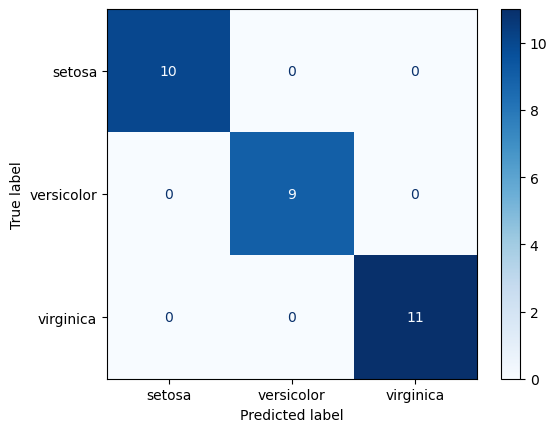

In [19]:
# 5. Confussion Matrix

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Memuat dataset Iris
data = load_iris()
X = data.data
y = data.target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model klasifikasi
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Menampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Menampilkan confusion matrix dengan visualisasi
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')

In [20]:
# 6. Bootstrap sampling
import numpy as np
# Data
data = np.array([10, 15, 8, 12, 14, 20, 18, 16, 11, 13])
# Bootstrap sampling
n_samples = 1000
bootstrap_means = np.zeros(n_samples)
for i in range(n_samples):
    bootstrap_sample = np.random.choice(data, size=len(data), replace=True)
    bootstrap_means[i] = np.mean(bootstrap_sample)
# Confidence interval (95%)
ci_lower = np.percentile(bootstrap_means, 2.5)
ci_upper = np.percentile(bootstrap_means, 97.5)
print("Mean:", np.mean(data))
print("95% Confidence Interval:", ci_lower, "-", ci_upper)

Mean: 13.7
95% Confidence Interval: 11.4975 - 16.1025


In [25]:
# 7. Evaluasi Kinerja Model
# A
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

# Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
random_state=42)

# Inisialisasi dan latih model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Prediksi dengan data pengujian
y_pred = model.predict(X_test)

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [ ]:
# 7. Evaluasi Kinerja Model
# B
# Contoh Confussion Matrix di NLP
# Impor library yang diperlukan
import nltk
from nltk.corpus import movie_reviews
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix, classification_report
# Unduh dataset sentimen ulasan film dari NLTK
nltk.download('movie_reviews')
# Ambil ulasan dan label dari dataset
documents = [(list(movie_reviews.words(fileid)), category)
for category in movie_reviews.categories()
for fileid in movie_reviews.fileids(category)]
# Pisahkan teks ulasan dan label
texts = [' '.join(document) for document, category in documents]

labels = [category for document, category in documents]
# Ubah teks menjadi vektor fitur TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(texts)
# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.2,
random_state=42)
# Inisialisasi dan latih model klasifikasi (misalnya, Linear SVM)
classifier = LinearSVC()
classifier.fit(X_train, y_train)
# Prediksi kelas pada data pengujian
y_pred = classifier.predict(X_test)
# Evaluasi model menggunakan confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# Evaluasi model menggunakan classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:")
print(report)


[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\GF63-1039\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\movie_reviews.zip.


Confusion Matrix:
[[170  29]
 [ 37 164]]

Classification Report:
              precision    recall  f1-score   support

         neg       0.82      0.85      0.84       199
         pos       0.85      0.82      0.83       201

    accuracy                           0.83       400
   macro avg       0.84      0.84      0.83       400
weighted avg       0.84      0.83      0.83       400



c:\Users\GF63-1039\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
